In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

#Import for smote  - install pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.io import arff


plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

data = arff.loadarff("seismic-bumps.arff")
df = pd.DataFrame(data[0])

df.head()

/Users/benjamincashman/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/benjamincashman/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/benjamincashman/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/benjamincashman/.local/lib/python3.6/site-packages/ten

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [2]:
#lets convert the data from bytes to chars
def byte_to_string(byte):
    return byte.decode('utf-8')

In [3]:
df["seismic"] = df["seismic"].apply(byte_to_string)
df["seismoacoustic"] = df["seismoacoustic"].apply(byte_to_string)
df["shift"] = df["shift"].apply(byte_to_string)
df["ghazard"] = df["ghazard"].apply(byte_to_string)
df["class"] = df["class"].apply(byte_to_string)

In [4]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
#encode all character variables to have numeric representations
df['ghazard'] = df['ghazard'].map({'a':0,'b':1,'c':2,'d':3})
df["seismic"] = df["seismic"].map({'a':0,'b':1,'c':2,'d':3})
df["seismoacoustic"] = df["seismoacoustic"].map({'a':0,'b':1,'c':2,'d':3})
#df["class"] = df["class"].map({'a':0,'b':1})
df["shift"] = df["shift"].map({'W':0,'N':1})



In [6]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,0,0,1,15180.0,48.0,-72.0,-72.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,1,14720.0,33.0,-70.0,-79.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,0,0,1,8050.0,30.0,-81.0,-78.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,1,28820.0,171.0,-23.0,40.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,0,0,1,12640.0,57.0,-63.0,-52.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
df['ghazard'].unique()

array([0, 1, 2])

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [9]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seismic,2584,NaN,NaN,NaN,0.349071,0.476769,0,0,0,1,1
seismoacoustic,2584,NaN,NaN,NaN,0.407121,0.527857,0,0,0,1,2
shift,2584,NaN,NaN,NaN,0.356424,0.479035,0,0,0,1,1
genergy,2584,NaN,NaN,NaN,90242.5,229201,100,11660,25485,52832.5,2.59565e+06
gpuls,2584,NaN,NaN,NaN,538.579,562.653,2,190,379,669,4518
gdenergy,2584,NaN,NaN,NaN,12.3758,80.3191,-96,-37,-6,38,1245
gdpuls,2584,NaN,NaN,NaN,4.5089,63.1666,-96,-36,-6,30.25,838
ghazard,2584,NaN,NaN,NaN,0.105263,0.342707,0,0,0,0,2
nbumps,2584,NaN,NaN,NaN,0.85952,1.36462,0,0,0,1,9
nbumps2,2584,NaN,NaN,NaN,0.393576,0.783772,0,0,0,1,8


In [10]:
#we are going to drop nbumps6 nbumps7 and nbumps89 - they are seemingly useless
 df.drop(columns=['nbumps6', 'nbumps7','nbumps89'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 16 columns):
seismic           2584 non-null int64
seismoacoustic    2584 non-null int64
shift             2584 non-null int64
genergy           2584 non-null float64
gpuls             2584 non-null float64
gdenergy          2584 non-null float64
gdpuls            2584 non-null float64
ghazard           2584 non-null int64
nbumps            2584 non-null float64
nbumps2           2584 non-null float64
nbumps3           2584 non-null float64
nbumps4           2584 non-null float64
nbumps5           2584 non-null float64
energy            2584 non-null float64
maxenergy         2584 non-null float64
class             2584 non-null object
dtypes: float64(11), int64(4), object(1)
memory usage: 323.1+ KB


In [12]:
#lets generate our true target (Danger) as a numeric value using label encoder
le = preprocessing.LabelEncoder()
df['seismic'] = le.fit_transform(df['seismic'])
df['ghazard'] = le.fit_transform(df['ghazard'])

In [13]:
#sns.pairplot(df);

In [14]:
df['nbumps3'].value_counts()

0.0    1879
1.0     497
2.0     140
3.0      42
4.0      20
5.0       5
7.0       1
Name: nbumps3, dtype: int64

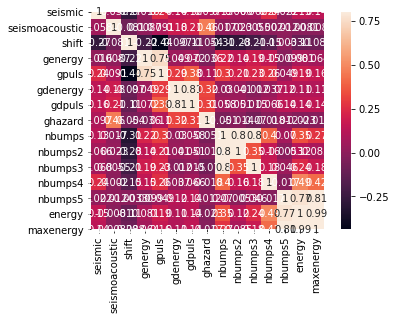

In [15]:
#correlation matrix
sns.heatmap(df.corr(), vmax=.8, square=True, annot = True);

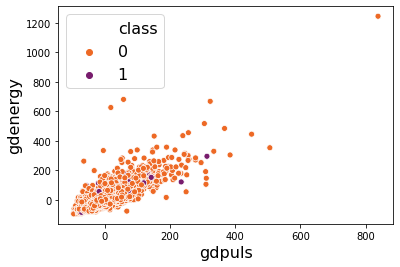

In [16]:
sns.scatterplot( palette="inferno_r", x=df.gdpuls , y= df.gdenergy, hue=df['class']);

In [17]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'energy', 'maxenergy', 'class'],
      dtype='object')

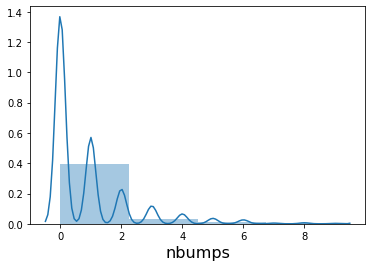

In [18]:
sns.distplot(df.nbumps, bins= 4);

In [19]:
#lets generate our true target (Danger) as a numeric value using label encoder
le = preprocessing.LabelEncoder()
df['seismic'] = le.fit_transform(df['seismic'])


In [20]:
df.describe()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
count,2584.000000,2584.000000,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,0.349071,0.407121,0.356424,9.024252e+04,538.579334,12.375774,4.508901,0.105263,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619
std,0.476769,0.527857,0.479035,2.292005e+05,562.652536,80.319051,63.166556,0.342707,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882
min,0.000000,0.000000,0.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,5.283250e+04,669.000000,38.000000,30.250000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000
max,1.000000,2.000000,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,2.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000


In [21]:
df['seismic'].unique()

array([0, 1])

In [22]:
df['seismic'].value_counts()

0    1682
1     902
Name: seismic, dtype: int64

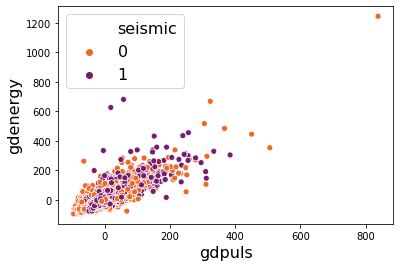

In [23]:
sns.scatterplot( palette="inferno_r", x=df.gdpuls , y= df.gdenergy, hue=df['seismic']);

In [24]:
df.isna().any()

seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
ghazard           False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
energy            False
maxenergy         False
class             False
dtype: bool

In [25]:
#Lets balance the class
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [26]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [30]:
oversampled_X, oversampled_Y = sm.fit_sample(X,y)
oversampled = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis = 1)
oversampled.columns = df.columns

X = oversampled.drop(["class"], axis=1)
y = oversampled['class']
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)

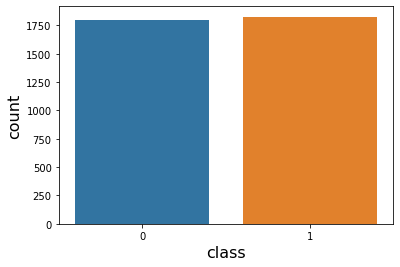

In [31]:
sns.countplot(y_train)